# Support Vector Machine

### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../1-RawData/breast_cancer_selected.csv")
df.head()

,concave_points_worst,perimeter_worst,concave_points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,diagnosis
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40,1
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08,1
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.15990,0.4245,0.7456,4.585,94.03,1
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.28390,0.8663,0.4956,3.445,27.23,1
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.13280,0.2050,0.7572,5.438,94.44,1


In [3]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101 )

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [8]:
from sklearn.svm import SVC

In [9]:
svm = SVC()

In [10]:
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
svm_grid_model = GridSearchCV(svm, param_grid, cv=10, n_jobs=-1, verbose=1)
svm_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [13]:
svm_grid_model.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

### Performance Metrics

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [15]:
y_pred = svm_grid_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.91      0.91      0.91        66

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



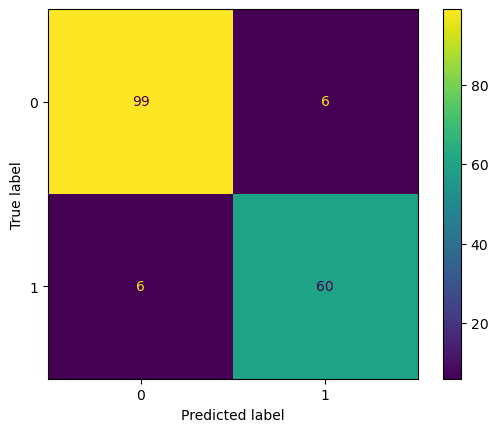

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()

### Exporting the model

In [17]:
import joblib

In [18]:
joblib.dump(svm_grid_model, '../4-TrainedModels/svm_model.pkl')

['../4-TrainedModels/svm_model.pkl']